# Question 2 - Do older planes suffer more delays?

## Importing Packages

In [1]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Datasets

In [2]:
# Importing the main cleaned dataset
cleaned_df = pd.read_csv("Files/Cleaned_Dataset.csv")
# Importing the Plane Data
plane_df = pd.read_csv("Files/plane-data.csv")

In [3]:
# Changing the setting to show all columns and showing first and last 5 rows pf the main dataset
pd.set_option("display.max_columns", None)
cleaned_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268890,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,0,0,0,0,0,0
14268891,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,0,0,0,0,0,0
14268892,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,0,0,0,15,0,0
14268893,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,0,0,0,0,0,36


In [4]:
# Showing first and last 5 rows of the plane dataset
plane_df.head(-5)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5019,N995AT,Corporation,BOEING,11/08/2002,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5020,N995DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/06/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1991
5021,N996AT,Corporation,BOEING,07/30/2002,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5022,N996DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,02/27/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1991


In [5]:
# Filtering to keep only the neccessary columns in the main dataset
cleaned_df = cleaned_df.filter(['TailNum', 'ArrDelay', 'DepDelay'], axis=1)
cleaned_df

,TailNum,ArrDelay,DepDelay
0,N657AW,6.0,-2.0
1,N834AW,-5.0,0.0
2,N605AW,-23.0,0.0
3,N312AW,-8.0,-2.0
4,N309AW,0.0,-8.0
...,...,...,...
14268890,N670DN,13.0,-7.0
14268891,N829MH,5.0,11.0
14268892,N623DL,15.0,-1.0
14268893,N970DL,36.0,38.0


In [6]:
# Filtering to keep only the neccessary columns in the plane dataset
plane_df_filtered = plane_df.filter(["tailnum", "year"])
plane_df_filtered

,tailnum,year
0,N050AA,NaN
1,N051AA,NaN
2,N052AA,NaN
3,N054AA,NaN
4,N055AA,NaN
...,...,...
5024,N997DL,1992
5025,N998AT,2002
5026,N998DL,1992
5027,N999CA,1998


In [7]:
# Checking for null values in the filtered plane dataset
plane_df_filtered.isnull().sum()

tailnum      0
year       549
dtype: int64

In [8]:
# Dropping all rows with null values
plane_df_filtered = plane_df_filtered.dropna(axis = 0)
plane_df_filtered

,tailnum,year
34,N10156,2004
35,N102UW,1998
36,N10323,1986
37,N103US,1999
38,N104UA,1998
...,...,...
5024,N997DL,1992
5025,N998AT,2002
5026,N998DL,1992
5027,N999CA,1998


In [9]:
# Checking if all null values have been removed
plane_df_filtered.isnull().sum()

tailnum    0
year       0
dtype: int64

In [10]:
# Showing general information about the filtered plane data to check if data has been cleaned properly
plane_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480 entries, 34 to 5028
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tailnum  4480 non-null   object
 1   year     4480 non-null   object
dtypes: object(2)
memory usage: 105.0+ KB


##### We can see that the "year" columns' data type is object which suggests uncleaned data as the data type should be integer

In [11]:
# Getting the value counts for the "year" column
plane_df_filtered["year"].value_counts()

2001    389
2000    341
1999    320
2002    306
2003    266
1998    248
2004    240
2005    193
1991    156
2006    152
1988    148
1992    146
None    145
1990    145
1997    134
1987    131
1989    110
1996    109
2007    107
1994    103
1995    101
1993    100
1986     92
1985     84
2008     37
1984     27
1968     24
1983     18
1967     16
1969     12
1979     11
1975     10
1980      8
1976      8
1978      8
1977      6
1982      6
0000      3
1973      3
1959      2
1963      2
1974      2
1970      2
1956      1
1972      1
1962      1
1957      1
1964      1
1965      1
1946      1
1966      1
1971      1
Name: year, dtype: int64

##### We can see that there are values "None" and "0000" which needs to be removed

In [12]:
# Dropping "None" and "0000" from the "year" column
plane_df_filtered.drop(plane_df_filtered[(plane_df_filtered["year"] == "0000") | (plane_df_filtered["year"] == "None") ].index, inplace = True)
plane_df_filtered

C:\Users\asd27\AppData\Local\Temp\ipykernel_16336\291402948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_df_filtered.drop(plane_df_filtered[(plane_df_filtered["year"] == "0000") | (plane_df_filtered["year"] == "None") ].index, inplace = True)


,tailnum,year
34,N10156,2004
35,N102UW,1998
36,N10323,1986
37,N103US,1999
38,N104UA,1998
...,...,...
5024,N997DL,1992
5025,N998AT,2002
5026,N998DL,1992
5027,N999CA,1998


In [13]:
# Checking if "None" and "0000" has been removed
plane_df_filtered["year"].value_counts()

2001    389
2000    341
1999    320
2002    306
2003    266
1998    248
2004    240
2005    193
1991    156
2006    152
1988    148
1992    146
1990    145
1997    134
1987    131
1989    110
1996    109
2007    107
1994    103
1995    101
1993    100
1986     92
1985     84
2008     37
1984     27
1968     24
1983     18
1967     16
1969     12
1979     11
1975     10
1980      8
1976      8
1978      8
1977      6
1982      6
1973      3
1970      2
1974      2
1963      2
1959      2
1966      1
1946      1
1964      1
1972      1
1962      1
1956      1
1957      1
1965      1
1971      1
Name: year, dtype: int64

In [14]:
# Converting the data type of the "year" column to integer
plane_df_filtered["year"] = plane_df_filtered["year"].astype(int)

C:\Users\asd27\AppData\Local\Temp\ipykernel_16336\2659562999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_df_filtered["year"] = plane_df_filtered["year"].astype(int)


In [15]:
# Checking if the data type has been converted
plane_df_filtered.dtypes

tailnum    object
year        int32
dtype: object

##### The common column we want to merge on is the TailNum, but the column name differs between the two dataframes

In [16]:
# Changing the "tailnum" column in the filtered plane dataframe to "TailNum" to make merging possible
plane_df_filtered.rename(columns = {"tailnum":"TailNum"}, inplace = True)
plane_df_filtered

C:\Users\asd27\AppData\Local\Temp\ipykernel_16336\3616773495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_df_filtered.rename(columns = {"tailnum":"TailNum"}, inplace = True)


,TailNum,year
34,N10156,2004
35,N102UW,1998
36,N10323,1986
37,N103US,1999
38,N104UA,1998
...,...,...
5024,N997DL,1992
5025,N998AT,2002
5026,N998DL,1992
5027,N999CA,1998


In [17]:
# Merging the two dataframes on the"TailNum" column
merged_df = pd.merge(cleaned_df, plane_df_filtered, on = ["TailNum"])
merged_df

,TailNum,ArrDelay,DepDelay,year
0,N657AW,6.0,-2.0,1999
1,N657AW,-5.0,1.0,1999
2,N657AW,-10.0,-4.0,1999
3,N657AW,-2.0,-5.0,1999
4,N657AW,-2.0,5.0,1999
...,...,...,...,...
11558100,N665JB,40.0,-7.0,2007
11558101,N665JB,10.0,3.0,2007
11558102,N665JB,-3.0,-4.0,2007
11558103,N665JB,-1.0,5.0,2007


In [18]:
# Checking the information of the merged datframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11558105 entries, 0 to 11558104
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   TailNum   object 
 1   ArrDelay  float64
 2   DepDelay  float64
 3   year      int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 396.8+ MB


In [19]:
# Checking for null values in the merged dataset
merged_df.isnull().sum()

TailNum     0
ArrDelay    0
DepDelay    0
year        0
dtype: int64

In [26]:
# Creating a new varibale to hold the mean average delay grouped by year
mean_ArrDelay_byyear = merged_df[["year","ArrDelay"]].groupby(["year"]).mean()

In [27]:
# Resetting the index so that "year" won't be considered the index
mean_ArrDelay_byyear = mean_ArrDelay_byyear.reset_index()
mean_ArrDelay_byyear

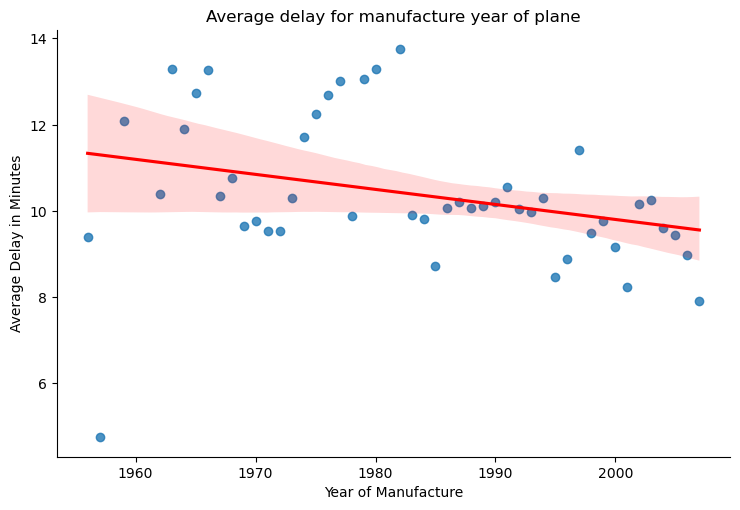

In [28]:
# Plotting a scatter plot with a line of best fit showing year of manufacture against average delay
sns.lmplot(data = mean_ArrDelay_byyear, 
        line_kws = {'color': 'r'}, 
        x = "year", y = "ArrDelay", 
        height = 5, aspect = 1.5).set(title = "Average delay for manufacture year of plane", 
                                      xlabel = "Year of Manufacture",
                                      ylabel = "Average Delay in Minutes")
# Saving the plot locally as a png
plt.savefig("Average Delay for Plane Year.png")